# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [64]:
import pandas as pd

In [65]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [66]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [67]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv')
df_seoul_business = pd.read_csv('df_seoul_business.csv')
df_seoul_people = pd.read_csv('df_seoul_people.csv')

In [68]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504


In [69]:
df_seoul_moving.head(3)

,도착 시군구 코드,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),이동인구(합)
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87


In [70]:
df_seoul_business.head(3)

,자치구,한식 일반 음식점업 종업자수,커피전문점 종업자수,기타주점업 종업자수,일반 교과 학원 종업자수,한식 육류요리 전문점 종업자수
0,강남구,11486,7273,2635,9020,5215
1,강동구,3388,1660,1349,2104,1459
2,강북구,2663,1095,1275,740,1176


In [71]:
df_seoul_people.head(3)

,자치구,세대,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자
0,종로구,73766.0,153684.0,144275.0,9409.0,1.96,28064.0
1,중구,63767.0,131450.0,122173.0,9277.0,1.92,24742.0
2,용산구,111207.0,236518.0,222169.0,14349.0,2.00,39461.0


In [72]:
data = pd.merge(standard, df_seoul_bus_station, on='자치구')
data = pd.merge(data, df_seoul_moving, on='도착 시군구 코드')
data = pd.merge(data, df_seoul_business, on='자치구')
data = pd.merge(data, df_seoul_people, on='자치구')

In [73]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head(3)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),...,커피전문점 종업자수,기타주점업 종업자수,일반 교과 학원 종업자수,한식 육류요리 전문점 종업자수,세대,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,...,3613,1467,466,1982,73766.0,153684.0,144275.0,9409.0,1.96,28064.0
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,...,3542,982,207,2121,63767.0,131450.0,122173.0,9277.0,1.92,24742.0
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,2076,1383,596,1184,111207.0,236518.0,222169.0,14349.0,2.00,39461.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   도착 시군구 코드         25 non-null     int64  
 1   자치구               25 non-null     object 
 2   정류장수              25 non-null     int64  
 3   노선수               25 non-null     int64  
 4   승차총승객수            25 non-null     int64  
 5   하차총승객수            25 non-null     int64  
 6   승차평균승객수           25 non-null     float64
 7   하차평균승객수           25 non-null     float64
 8   평균 이동 시간(분)       25 non-null     float64
 9   이동인구(평균)          25 non-null     float64
 10  이동 시간 합계(분)       25 non-null     int64  
 11  이동인구(합)           25 non-null     float64
 12  한식 일반 음식점업 종업자수   25 non-null     int64  
 13  커피전문점 종업자수        25 non-null     int64  
 14  기타주점업 종업자수        25 non-null     int64  
 15  일반 교과 학원 종업자수     25 non-null     int64  
 16  한식 육류요리 전문점 종업자수  25 non-null     int64  
 17 

In [75]:
df = data.drop('도착 시군구 코드', axis=1)

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),이동인구(합),...,커피전문점 종업자수,기타주점업 종업자수,일반 교과 학원 종업자수,한식 육류요리 전문점 종업자수,세대,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자
정류장수,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.223747,0.374723,0.356947,0.355635,...,0.209808,0.305757,0.291741,0.276869,0.554665,0.566615,0.563648,-0.074076,0.315087,0.554425
노선수,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003649,0.388332,0.226437,...,0.425180,0.241297,-0.057098,0.229729,-0.241699,-0.281536,-0.295912,0.376667,-0.295018,-0.334297
승차총승객수,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.474049,0.581339,0.576553,...,0.530386,0.513763,0.404726,0.519703,0.408783,0.364433,0.354262,0.129526,-0.015831,0.295889
하차총승객수,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463898,0.572769,0.558699,...,0.494266,0.505287,0.372916,0.491253,0.443088,0.388119,0.376908,0.146077,-0.039725,0.322254
승차평균승객수,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.382202,-0.079733,0.140483,0.067920,...,0.204745,0.225702,-0.145047,0.072154,-0.159581,-0.269854,-0.287016,0.433584,-0.503971,-0.306123
하차평균승객수,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.356171,-0.072466,0.148381,0.062384,...,0.160374,0.232370,-0.174928,0.045420,-0.080242,-0.207643,-0.226520,0.455231,-0.531749,-0.243298
평균 이동 시간(분),0.223747,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,1.000000,0.373091,-0.141914,0.095727,...,-0.181316,0.014044,0.252080,0.077613,0.599707,0.638885,0.653882,-0.476829,0.414361,0.712731
이동인구(평균),0.374723,-0.003649,0.474049,0.463898,-0.079733,-0.072466,0.373091,1.000000,0.808313,0.951399,...,0.736411,0.687222,0.774123,0.867855,0.619580,0.696328,0.701073,-0.270963,0.449659,0.531426
이동 시간 합계(분),0.356947,0.388332,0.581339,0.572769,0.140483,0.148381,-0.141914,0.808313,1.000000,0.923298,...,0.835772,0.707177,0.515618,0.842601,0.344073,0.373570,0.371008,-0.035849,0.134222,0.186226
이동인구(합),0.355635,0.226437,0.576553,0.558699,0.067920,0.062384,0.095727,0.951399,0.923298,1.000000,...,0.873656,0.741252,0.742980,0.937612,0.465023,0.528251,0.529148,-0.147604,0.320777,0.336376


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
    - 노선수가 많을 수록 승하차 수가 많다?

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [76]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

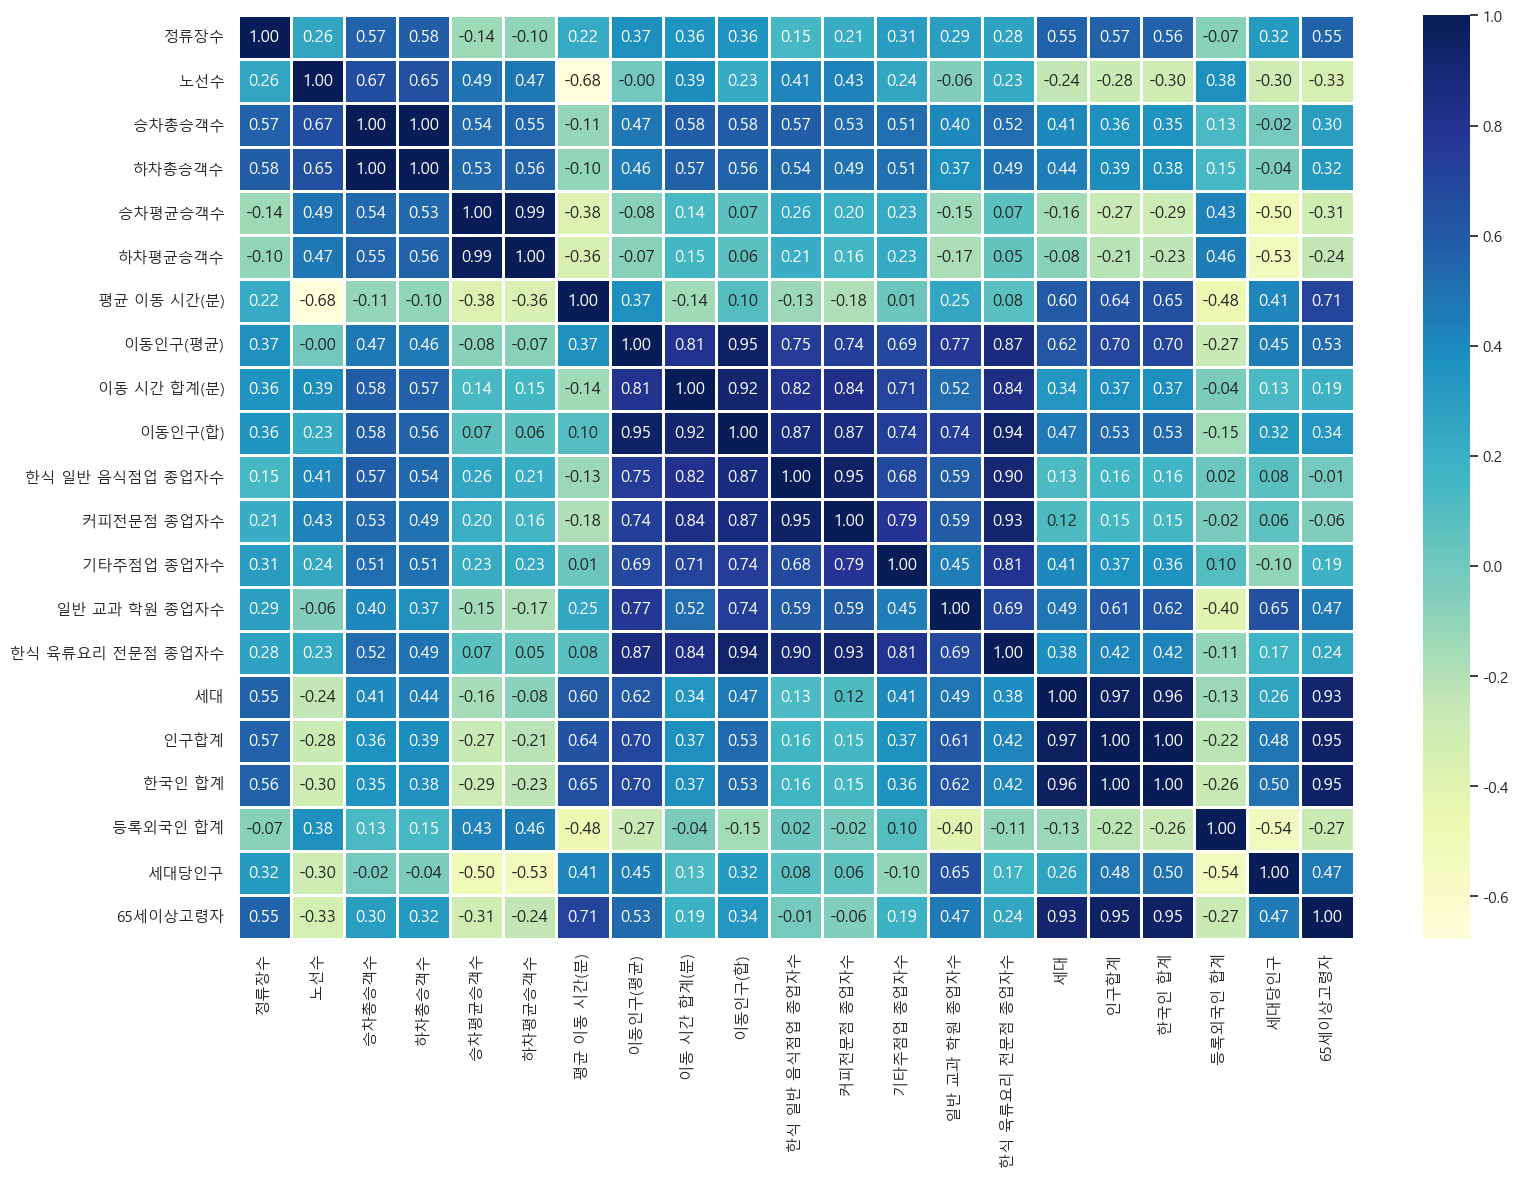

In [77]:
corr = df.corr()

plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, annot=True, linewidths=.8, cmap="YlGnBu", fmt='.2f')
plt.show()

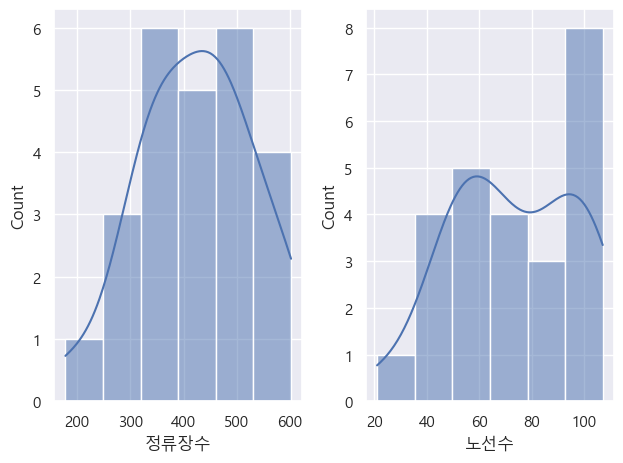

In [78]:
plt.subplot(1, 2, 1)
sns.histplot(df['정류장수'], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df['노선수'], kde=True)

plt.tight_layout()
plt.show()

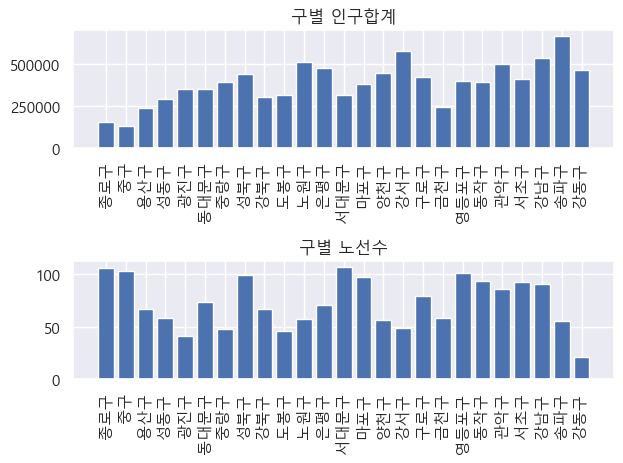

In [79]:
plt.subplot(2, 1, 1)
plt.bar(df['자치구'], df['인구합계'])
plt.xticks(rotation=90)
plt.title('구별 인구합계')

plt.subplot(2, 1, 2)
plt.bar(df['자치구'], df['노선수'])
plt.xticks(rotation=90)
plt.title('구별 노선수')

plt.tight_layout()
plt.show()

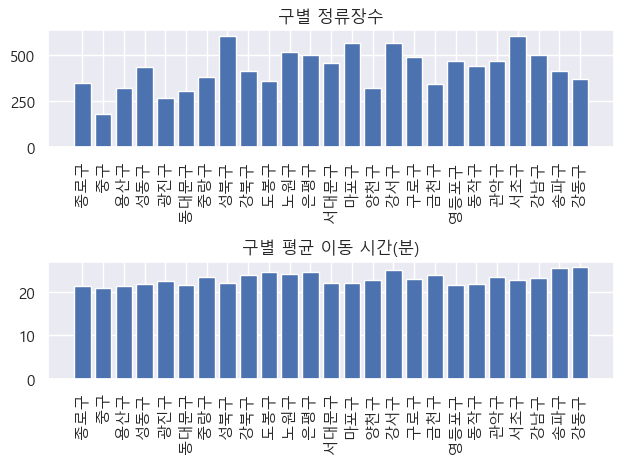

In [80]:
plt.subplot(2, 1, 1)
plt.bar(df['자치구'], df['정류장수'])
plt.xticks(rotation=90)
plt.title('구별 정류장수')

plt.subplot(2, 1, 2)
plt.bar(df['자치구'], df['평균 이동 시간(분)'])
plt.xticks(rotation=90)
plt.title('구별 평균 이동 시간(분)')

plt.tight_layout()
plt.show()

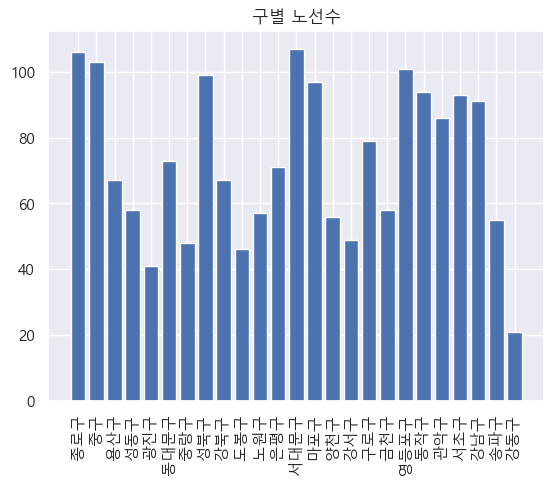

In [117]:
plt.bar(df['자치구'], df['노선수'])
plt.xticks(rotation=90)
plt.title('구별 노선수')
plt.show()

In [114]:
def eda1_n(data, var, bins=20):
    # 기초통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    sns.histplot(x=var, data=data, bins=bins, kde=True)

    plt.subplot(2, 1, 2)
    sns.boxplot(x=var, data=data)
    plt.grid()

    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
정류장수,25.0,424.6,106.279506,178.0,349.0,435.0,499.0,602.0


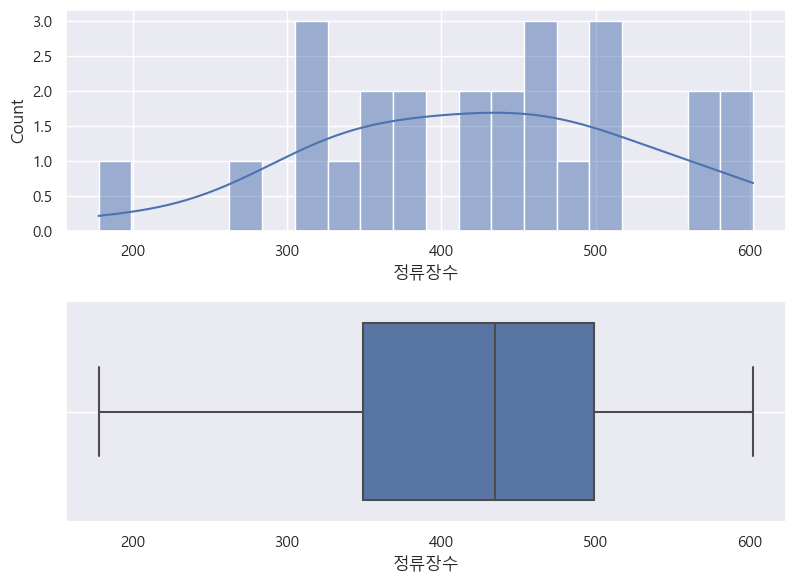

In [115]:
eda1_n(df, '정류장수')

,count,mean,std,min,25%,50%,75%,max
노선수,25.0,72.92,23.808122,21.0,56.0,71.0,94.0,107.0


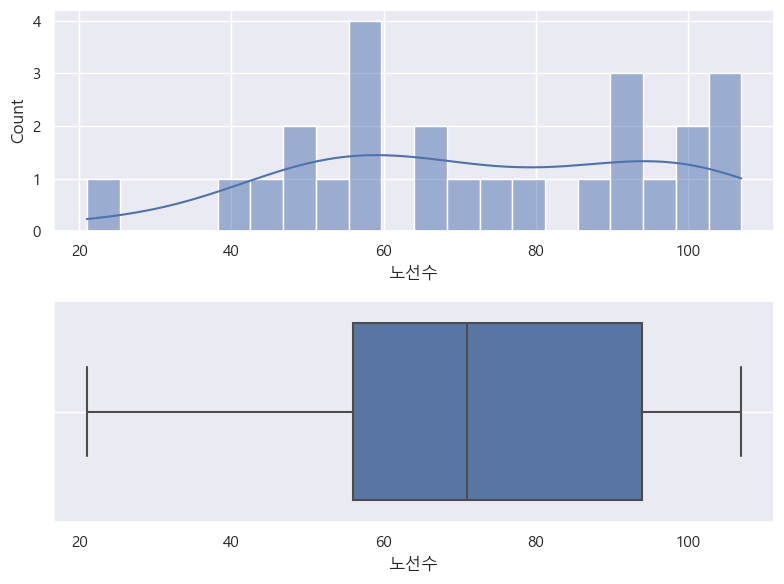

In [116]:
eda1_n(df, '노선수')

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [81]:
list(df)

['자치구',
 '정류장수',
 '노선수',
 '승차총승객수',
 '하차총승객수',
 '승차평균승객수',
 '하차평균승객수',
 '평균 이동 시간(분)',
 '이동인구(평균)',
 '이동 시간 합계(분)',
 '이동인구(합)',
 '한식 일반 음식점업 종업자수',
 '커피전문점 종업자수',
 '기타주점업 종업자수',
 '일반 교과 학원 종업자수',
 '한식 육류요리 전문점 종업자수',
 '세대',
 '인구합계',
 '한국인 합계',
 '등록외국인 합계',
 '세대당인구',
 '65세이상고령자']

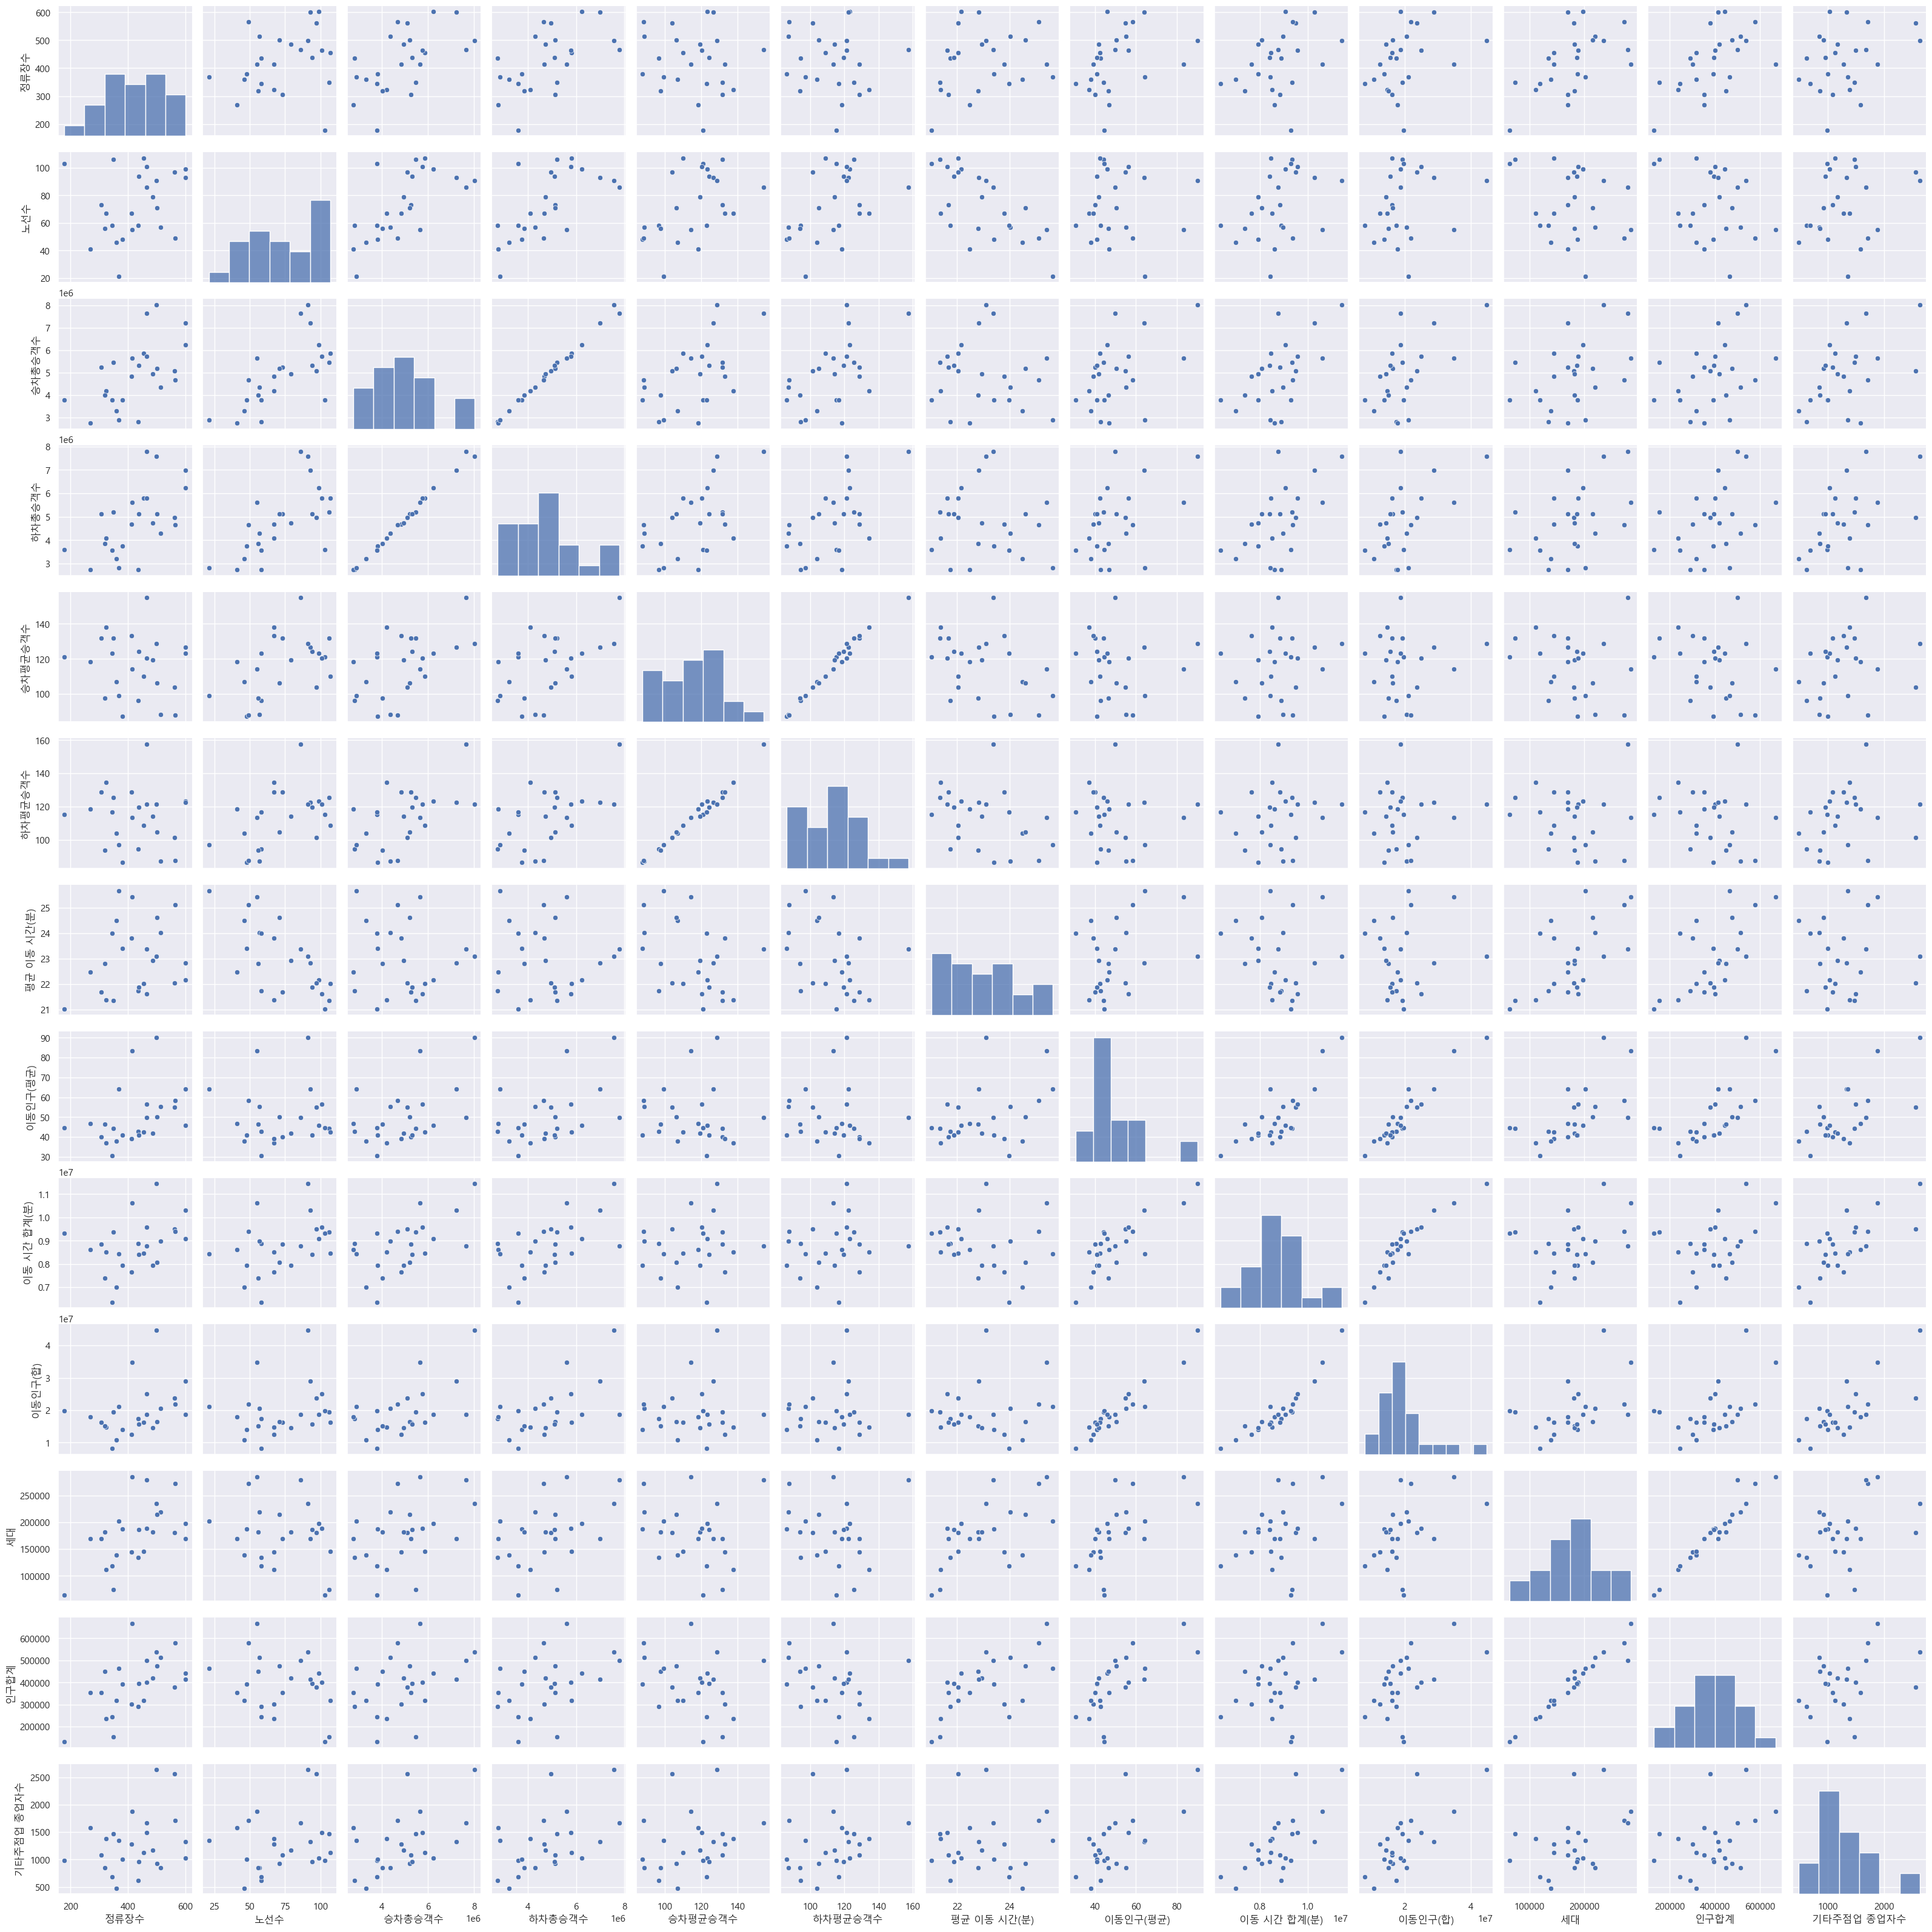

In [82]:
cols = ['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '평균 이동 시간(분)', '이동인구(평균)',
    '이동 시간 합계(분)', '이동인구(합)', '세대', '인구합계', '기타주점업 종업자수']
sns.pairplot(df[cols])
plt.show()

### 1) 노선수가 많을수록 승하차수가 많다?

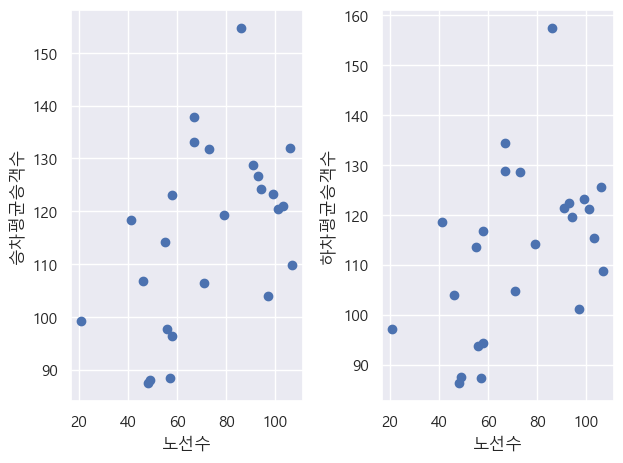

In [83]:
plt.subplot(1, 2, 1)
plt.scatter(df['노선수'], df['승차평균승객수'])
plt.xlabel('노선수')
plt.ylabel('승차평균승객수')

plt.subplot(1, 2, 2)
plt.scatter(df['노선수'], df['하차평균승객수'])
plt.xlabel('노선수')
plt.ylabel('하차평균승객수')

plt.tight_layout()
plt.show()

In [84]:
import scipy.stats as spst

spst.pearsonr(df['노선수'], df['승차평균승객수'])

(0.4935407909274122, 0.012170019218131729)

In [85]:
spst.pearsonr(df['노선수'], df['하차평균승객수'])

(0.4704401254149345, 0.017632441540646464)

### 2) 인구수와 승하차평균수는 관련이 있다?

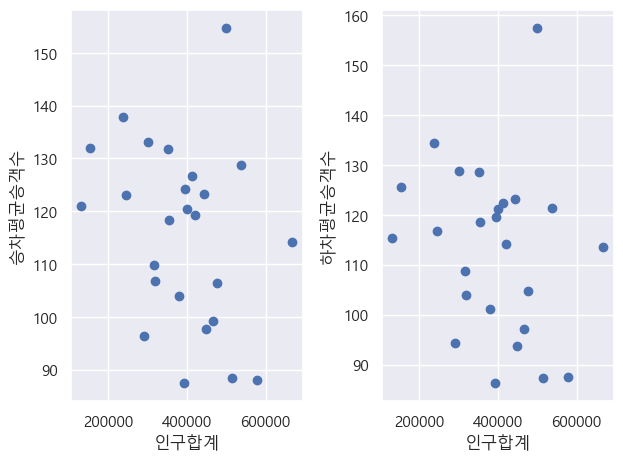

In [86]:
plt.subplot(1, 2, 1)
plt.scatter(df['인구합계'], df['승차평균승객수'])
plt.xlabel('인구합계')
plt.ylabel('승차평균승객수')

plt.subplot(1, 2, 2)
plt.scatter(df['인구합계'], df['하차평균승객수'])
plt.xlabel('인구합계')
plt.ylabel('하차평균승객수')

plt.tight_layout()
plt.show()

In [87]:
spst.pearsonr(df['인구합계'], df['승차평균승객수'])

(-0.2698536222813491, 0.19204604808981418)

In [88]:
spst.pearsonr(df['인구합계'], df['하차평균승객수'])

(-0.20764323661503242, 0.31926292480408913)

### 3) 노선수와 이동인구간의 관계?

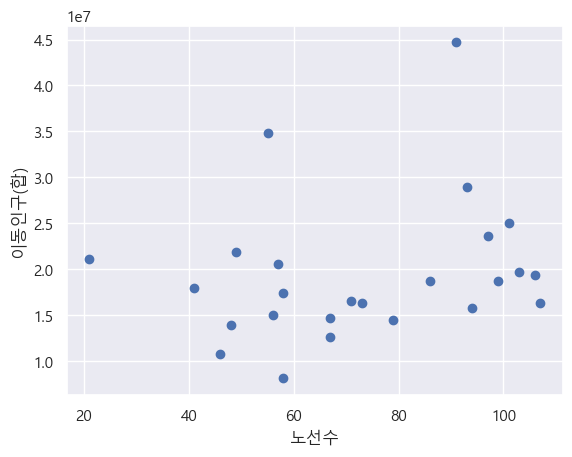

In [89]:
plt.scatter(df['노선수'], df['이동인구(합)'])
plt.xlabel('노선수')
plt.ylabel('이동인구(합)')

plt.show()

In [90]:
spst.pearsonr(df['노선수'], df['이동인구(합)'])

(0.22643737215790807, 0.27640170657157315)

### 4) 노선수와 세대수간의 관계?

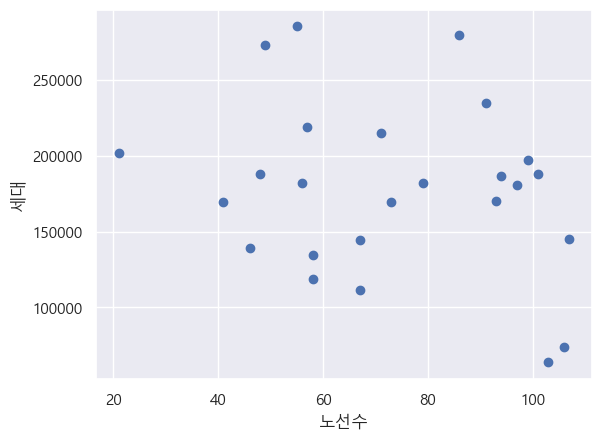

In [91]:
plt.scatter(df['노선수'], df['세대'])
plt.xlabel('노선수')
plt.ylabel('세대')

plt.show()

In [92]:
spst.pearsonr(df['노선수'], df['세대'])

(-0.24169932049816675, 0.2444303363013717)

### 5) 정류장 수와 이동인구(합)

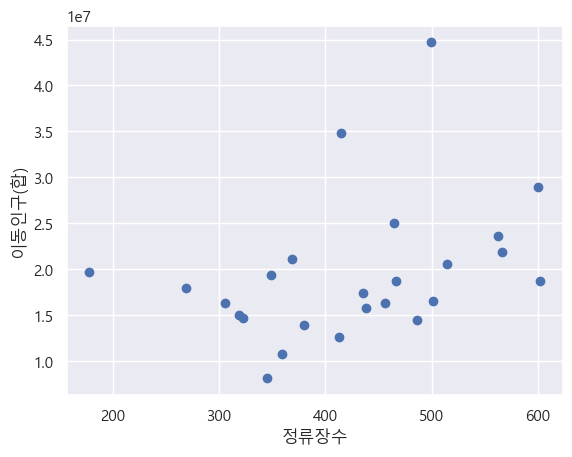

In [93]:
plt.scatter(df['정류장수'], df['이동인구(합)'])
plt.xlabel('정류장수')
plt.ylabel('이동인구(합)')

plt.show()

In [94]:
spst.pearsonr(df['정류장수'], df['이동인구(합)'])

(0.3556345657023647, 0.08103838386719442)

### 6) 정류장 수와 승차 총 승객수

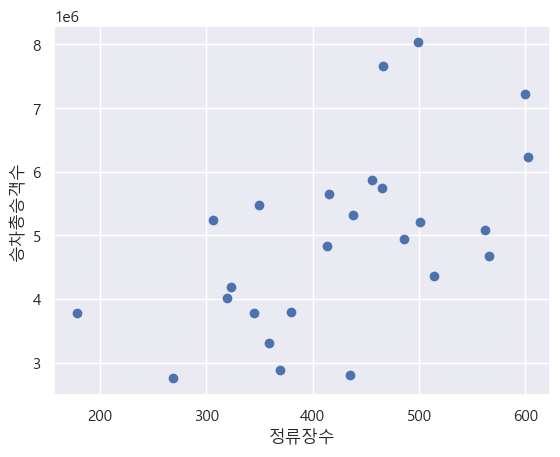

(0.5666813370974585, 0.003141977397117322)

In [95]:
plt.scatter(df['정류장수'], df['승차총승객수'])
plt.xlabel('정류장수')
plt.ylabel('승차총승객수')

plt.show()

spst.pearsonr(df['정류장수'], df['승차총승객수'])

### 7) 인구합계와 정류장 수

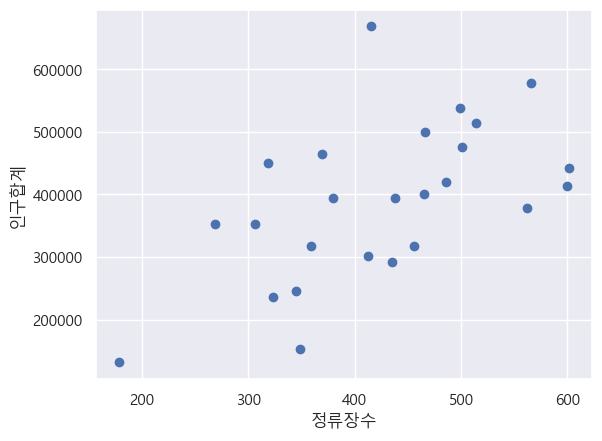

(0.5666148323603177, 0.003146292242946791)

In [96]:
plt.scatter(df['정류장수'], df['인구합계'])
plt.xlabel('정류장수')
plt.ylabel('인구합계')

plt.show()

spst.pearsonr(df['정류장수'], df['인구합계'])

### 8) 이동인구와 정류장 수

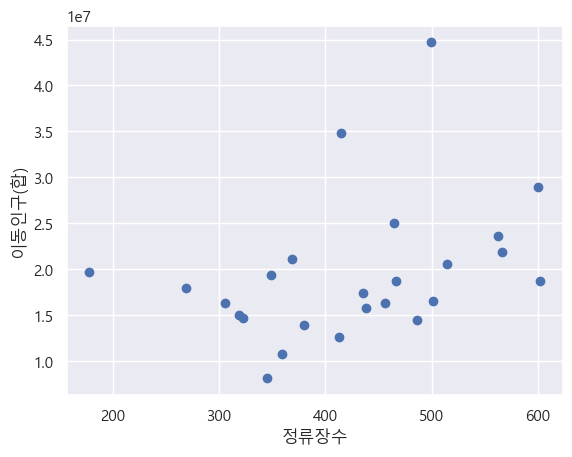

(0.3556345657023647, 0.08103838386719442)

In [97]:
plt.scatter(df['정류장수'], df['이동인구(합)'])
plt.xlabel('정류장수')
plt.ylabel('이동인구(합)')

plt.show()

spst.pearsonr(df['정류장수'], df['이동인구(합)'])

### 9) 정류장수 / 승차총승객수 비율 확인

In [98]:
df['정류장수/승차총승객수'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['정류장수/승차총승객수']).head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),...,기타주점업 종업자수,일반 교과 학원 종업자수,한식 육류요리 전문점 종업자수,세대,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자,정류장수/승차총승객수
1,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,...,982,207,2121,63767.0,131450.0,122173.0,9277.0,1.92,24742.0,0.471314
5,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,...,1082,984,1509,169695.0,352592.0,337982.0,14610.0,1.99,62963.0,0.583907
20,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,...,1672,1230,1628,279353.0,500336.0,486375.0,13961.0,1.74,80686.0,0.608687
22,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,...,2635,9020,5215,234612.0,537338.0,532577.0,4761.0,2.27,79575.0,0.621382
0,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,...,1467,466,1982,73766.0,153684.0,144275.0,9409.0,1.96,28064.0,0.638150


### 10) 커피전문점 종업자수와 노선수


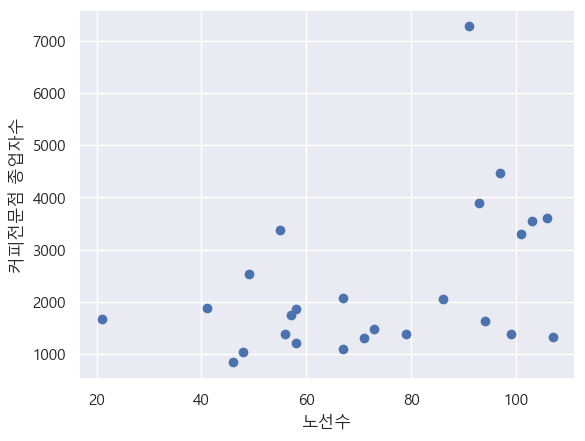

(0.42518048108643286, 0.03410811239601253)

In [99]:
plt.scatter(df['노선수'], df['커피전문점 종업자수'])
plt.xlabel('노선수')
plt.ylabel('커피전문점 종업자수')

plt.show()

spst.pearsonr(df['노선수'], df['커피전문점 종업자수'])

### 11) 한식 일반 음식점업 종업자수와 노선수


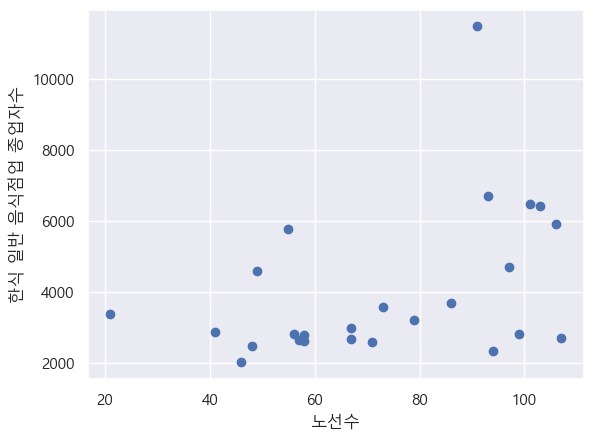

(0.41355583148989006, 0.03988391106862527)

In [100]:
plt.scatter(df['노선수'], df['한식 일반 음식점업 종업자수'])
plt.xlabel('노선수')
plt.ylabel('한식 일반 음식점업 종업자수')

plt.show()

spst.pearsonr(df['노선수'], df['한식 일반 음식점업 종업자수'])

### 12) 한식 + 커피와 노선수

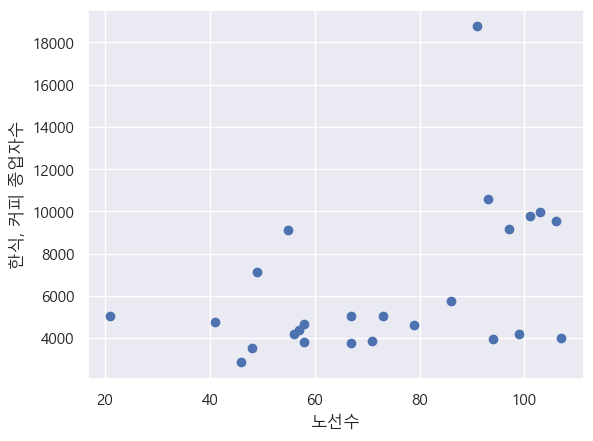

(0.42350845567197026, 0.034895154324768536)

In [101]:
df['한식, 커피 종업자수'] = df['한식 일반 음식점업 종업자수'] + df['커피전문점 종업자수']

plt.scatter(df['노선수'], df['한식, 커피 종업자수'])
plt.xlabel('노선수')
plt.ylabel('한식, 커피 종업자수')

plt.show()

spst.pearsonr(df['노선수'], df['한식, 커피 종업자수'])

### 13) 노선수 / 한식, 커피 종업자수 비율 확인

In [102]:
df['노선수/한식, 커피 종업자수'] = df['노선수'] / df['한식, 커피 종업자수'] * 10000
df.sort_values(by=['노선수/한식, 커피 종업자수']).head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),...,한식 육류요리 전문점 종업자수,세대,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자,정류장수/승차총승객수,"한식, 커피 종업자수","노선수/한식, 커피 종업자수"
24,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,...,1459,201926.0,465097.0,461300.0,3797.0,2.28,75477.0,1.276793,5048,41.600634
22,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,...,5215,234612.0,537338.0,532577.0,4761.0,2.27,79575.0,0.621382,18759,48.510049
23,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,10610520,...,3467,285106.0,668261.0,662607.0,5654.0,2.32,99854.0,0.735588,9132,60.227770
15,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,9388010,...,2297,272572.0,578426.0,573046.0,5380.0,2.10,93924.0,1.209122,7114,68.878268
4,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,...,1678,169483.0,353110.0,340707.0,12403.0,2.01,52604.0,0.978378,4748,86.352148


### 14) 노선수 / 이동인구(합) 비율 확인

In [103]:
df['노선수/이동인구(합)'] = df['노선수'] / df['이동인구(합)'] * 10000
df.sort_values(by=['노선수/이동인구(합)']).head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),...,세대,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자,정류장수/승차총승객수,"한식, 커피 종업자수","노선수/한식, 커피 종업자수",노선수/이동인구(합)
24,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,...,201926.0,465097.0,461300.0,3797.0,2.28,75477.0,1.276793,5048,41.600634,0.009952
23,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,10610520,...,285106.0,668261.0,662607.0,5654.0,2.32,99854.0,0.735588,9132,60.227770,0.015788
22,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,...,234612.0,537338.0,532577.0,4761.0,2.27,79575.0,0.621382,18759,48.510049,0.020365
15,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,9388010,...,272572.0,578426.0,573046.0,5380.0,2.10,93924.0,1.209122,7114,68.878268,0.022436
4,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,...,169483.0,353110.0,340707.0,12403.0,2.01,52604.0,0.978378,4748,86.352148,0.022845


### 15) 정류장수 / 이동인구(합) 비율 확인

In [104]:
df['정류장수/이동인구(합)'] = df['정류장수'] / df['이동인구(합)'] * 10000
df.sort_values(by=['정류장수/이동인구(합)']).head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),...,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자,정류장수/승차총승객수,"한식, 커피 종업자수","노선수/한식, 커피 종업자수",노선수/이동인구(합),정류장수/이동인구(합)
1,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,...,131450.0,122173.0,9277.0,1.92,24742.0,0.471314,9956,103.455203,0.052244,0.090285
22,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,...,537338.0,532577.0,4761.0,2.27,79575.0,0.621382,18759,48.510049,0.020365,0.111671
23,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,10610520,...,668261.0,662607.0,5654.0,2.32,99854.0,0.735588,9132,60.227770,0.015788,0.119124
4,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,...,353110.0,340707.0,12403.0,2.01,52604.0,0.978378,4748,86.352148,0.022845,0.149883
24,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,...,465097.0,461300.0,3797.0,2.28,75477.0,1.276793,5048,41.600634,0.009952,0.174869


### 16) 노선수와 평균 이동 시간(분)

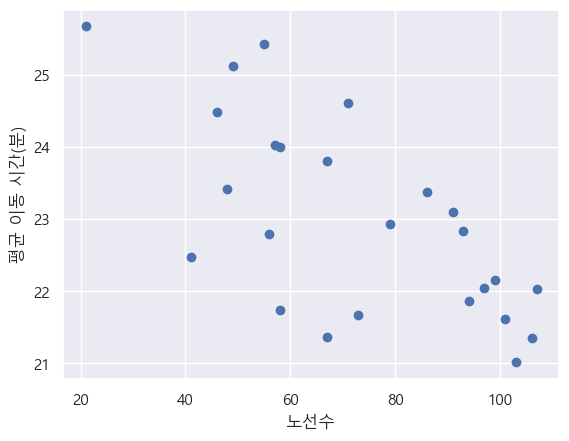

(-0.6786000547455109, 0.00019237294667152178)

In [105]:
plt.scatter(df['노선수'], df['평균 이동 시간(분)'])
plt.xlabel('노선수')
plt.ylabel('평균 이동 시간(분)')

plt.show()

spst.pearsonr(df['노선수'], df['평균 이동 시간(분)'])

- 평균 이동 시간이 많이 걸리면 노선수를 증가시켜줘야한다?

In [106]:
df.sort_values(by=['평균 이동 시간(분)']).head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),...,인구합계,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자,정류장수/승차총승객수,"한식, 커피 종업자수","노선수/한식, 커피 종업자수",노선수/이동인구(합),정류장수/이동인구(합)
1,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,...,131450.0,122173.0,9277.0,1.92,24742.0,0.471314,9956,103.455203,0.052244,0.090285
0,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,...,153684.0,144275.0,9409.0,1.96,28064.0,0.638150,9525,111.286089,0.054679,0.180030
2,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,...,236518.0,222169.0,14349.0,2.00,39461.0,0.770887,5063,132.332609,0.045556,0.219622
18,영등포구,465,101,5739875,5783211,120.337855,121.246404,21.615227,56.414634,9581360,...,400241.0,376740.0,23501.0,2.00,63547.0,0.810122,9771,103.367107,0.040389,0.185949
5,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,...,352592.0,337982.0,14610.0,1.99,62963.0,0.583907,5038,144.898769,0.044818,0.187867


### 17) 정류장수 / 인구합계

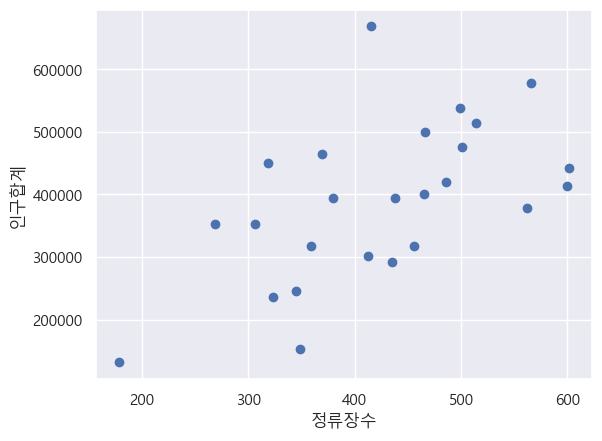

(0.5666148323603177, 0.003146292242946791)

In [ ]:
plt.scatter(df['정류장수'], df['인구합계'])
plt.xlabel('정류장수')
plt.ylabel('인구합계')

plt.show()

spst.pearsonr(df['정류장수'], df['인구합계'])

In [118]:
df['정류장수/인구합계'] = df['정류장수'] / df['인구합계'] * 10000
df.sort_values(by=['정류장수/인구합계']).head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),...,한국인 합계,등록외국인 합계,세대당인구,65세이상고령자,정류장수/승차총승객수,"한식, 커피 종업자수","노선수/한식, 커피 종업자수",노선수/이동인구(합),정류장수/이동인구(합),정류장수/인구합계
23,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,10610520,...,662607.0,5654.0,2.32,99854.0,0.735588,9132,60.227770,0.015788,0.119124,6.210148
14,양천구,319,56,4009172,3851173,97.627526,93.780086,22.793734,46.544142,7379950,...,446182.0,3196.0,2.45,69953.0,0.795676,4175,134.131737,0.037161,0.211684,7.098701
4,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,...,340707.0,12403.0,2.01,52604.0,0.978378,4748,86.352148,0.022845,0.149883,7.618023
24,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,...,461300.0,3797.0,2.28,75477.0,1.276793,5048,41.600634,0.009952,0.174869,7.933829
5,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,...,337982.0,14610.0,1.99,62963.0,0.583907,5038,144.898769,0.044818,0.187867,8.678586


### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [108]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
# import scipy.stats as spst

# spst.pearsonr(X,Y)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

- 노선수
    - 승차총승객수, 하차총승객수, 승차평균승객수, 하차평균승객수, 커피전문점 종업자수, 한식 일반 음식점업 종업자수
    - 평균 이동 시간(분)
- 정류장 수
    - 승차총승객수, 하차총승객수, 세대, 인구합계, 한국인 합계, 65세 이상 고령자

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

강남구, 강동구, 중구, 송파구